<a href="https://colab.research.google.com/github/khadija267/Text-Classification/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Project Set-up

In [ ]:
!pip install transformers
!pip install datasets
!pip install sentencepiece
!pip install rouge

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import AdamW
from torch.utils.data import DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
from transformers import AdamW
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset
from rouge import Rouge
import matplotlib.pyplot as plt

## 2.Data Collection

In [ ]:
dataset = load_dataset('cnn_dailymail', '3.0.0', split='train')

# Extract input texts and target texts from the dataset
input_texts = dataset['article']
target_texts = dataset['highlights']


In [ ]:
data_size=len(input_texts)

## 3.Data Preprocessing:

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_texts, target_texts, tokenizer):
        self.input_texts = input_texts
        self.target_texts = target_texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.input_texts)

    def __getitem__(self, idx):
        input_text = self.input_texts[idx]
        target_text = self.target_texts[idx]
        input_ids = self.tokenizer.encode(input_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')[0]
        target_ids = self.tokenizer.encode(target_text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')[0]
        return input_ids, target_ids

tokenizer = T5Tokenizer.from_pretrained('t5-base')
dataset = CustomDataset(input_texts, target_texts, tokenizer)


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:217: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes 

## 4.Model Construction:

In [58]:
model_name = 't5-base'
model = T5ForConditionalGeneration.from_pretrained(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
batch_size=10
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

optimizer = AdamW(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

#num_epochs = 3

model.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
train_loss_values = []
num_batches=int(data_size/batch_size)

epoch_train_loss = 0.0
for batch_ind,batch in enumerate(train_loader):
    batch_input_ids, batch_target_ids = batch
    batch_input_ids = batch_input_ids.to(device)
    batch_target_ids = batch_target_ids.to(device)

    optimizer.zero_grad()

    outputs = model(input_ids=batch_input_ids, labels=batch_target_ids)
    loss = outputs.loss

    loss.backward()
    optimizer.step()
    epoch_train_loss += loss.item() * len(batch_input_ids)
    print(f'Batch [{batch_ind+1}/{num_batches}], Loss: {loss.item():.4f}')

    epoch_train_loss /= len(dataset)

    train_loss_values.append(epoch_train_loss)



Streaming output truncated to the last 5000 lines.
Batch [23713/28711], Loss: 1.1276
Batch [23714/28711], Loss: 0.9791
Batch [23715/28711], Loss: 1.0743
Batch [23716/28711], Loss: 1.0551
Batch [23717/28711], Loss: 0.8534
Batch [23718/28711], Loss: 1.0844
Batch [23719/28711], Loss: 0.7950
Batch [23720/28711], Loss: 1.0179
Batch [23721/28711], Loss: 0.8071
Batch [23722/28711], Loss: 0.9714
Batch [23723/28711], Loss: 1.0194
Batch [23724/28711], Loss: 0.8067
Batch [23725/28711], Loss: 0.9362
Batch [23726/28711], Loss: 1.0126
Batch [23727/28711], Loss: 0.8999
Batch [23728/28711], Loss: 1.0263
Batch [23729/28711], Loss: 0.7368
Batch [23730/28711], Loss: 0.8508
Batch [23731/28711], Loss: 1.0178
Batch [23732/28711], Loss: 1.2126
Batch [23733/28711], Loss: 0.6192
Batch [23734/28711], Loss: 0.9907
Batch [23735/28711], Loss: 0.9844
Batch [23736/28711], Loss: 1.0018
Batch [23737/28711], Loss: 0.8692
Batch [23738/28711], Loss: 1.1629
Batch [23739/28711], Loss: 1.0750
Batch [23740/28711], Loss: 1.18

## 5.Model Evaluation:

In [ ]:
train_loss_values

[]

In [ ]:
val_loss_values = []
val_dataset = load_dataset('cnn_dailymail', '3.0.0', split='validation')
batches_val_dataset=int(len(val_dataset)/batch_size)

# Extract input texts and target texts from the validation dataset
val_input_texts = val_dataset['article']
val_target_texts = val_dataset['highlights']

# Create a custom dataset for validation
val_dataset = CustomDataset(val_input_texts, val_target_texts, tokenizer)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model.eval()

val_loss = 0.0
for val_batch_ind,val_batch in enumerate(val_loader):
    val_batch_input_ids, val_batch_target_ids = val_batch
    val_batch_input_ids = val_batch_input_ids.to(device)
    val_batch_target_ids = val_batch_target_ids.to(device)

    with torch.no_grad():
        val_outputs = model(input_ids=val_batch_input_ids, labels=val_batch_target_ids)
        val_loss += val_outputs.loss.item() * len(val_batch_input_ids)
    print(f'Batch [{val_batch_ind+1}/{batches_val_dataset}], Val Loss: {loss.item():.4f}')

    val_loss /= batch_size
    val_loss_values.append(val_loss)

model.train()



Batch [1/1336], Val Loss: 1.0896
Batch [2/1336], Val Loss: 1.0896
Batch [3/1336], Val Loss: 1.0896
Batch [4/1336], Val Loss: 1.0896
Batch [5/1336], Val Loss: 1.0896
Batch [6/1336], Val Loss: 1.0896
Batch [7/1336], Val Loss: 1.0896
Batch [8/1336], Val Loss: 1.0896
Batch [9/1336], Val Loss: 1.0896
Batch [10/1336], Val Loss: 1.0896
Batch [11/1336], Val Loss: 1.0896
Batch [12/1336], Val Loss: 1.0896
Batch [13/1336], Val Loss: 1.0896
Batch [14/1336], Val Loss: 1.0896
Batch [15/1336], Val Loss: 1.0896
Batch [16/1336], Val Loss: 1.0896
Batch [17/1336], Val Loss: 1.0896
Batch [18/1336], Val Loss: 1.0896
Batch [19/1336], Val Loss: 1.0896
Batch [20/1336], Val Loss: 1.0896
Batch [21/1336], Val Loss: 1.0896
Batch [22/1336], Val Loss: 1.0896
Batch [23/1336], Val Loss: 1.0896
Batch [24/1336], Val Loss: 1.0896
Batch [25/1336], Val Loss: 1.0896
Batch [26/1336], Val Loss: 1.0896
Batch [27/1336], Val Loss: 1.0896
Batch [28/1336], Val Loss: 1.0896
Batch [29/1336], Val Loss: 1.0896
Batch [30/1336], Val Lo

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
# Save the model checkpoint
checkpoint_path = f'model_checkpoint_epoch_{val_batch_ind+1}.pt'
torch.save(model.state_dict(), checkpoint_path)

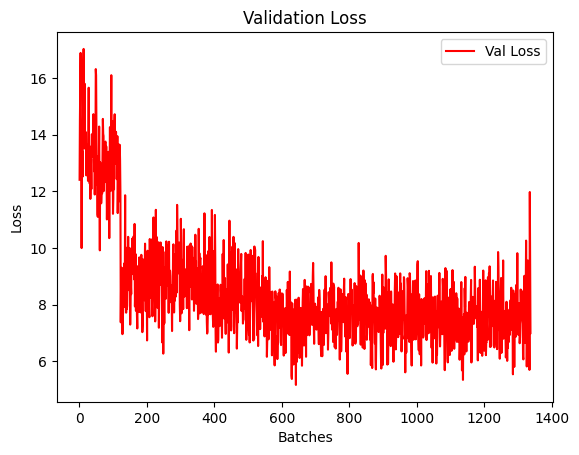

In [ ]:
# Plot the loss values
plt.plot(range(1, batches_val_dataset+2 ), val_loss_values, 'r', label='Val Loss')
plt.title('Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6.Model Inference:


In [ ]:
# Save the trained model
model.save_pretrained('text_summarization_model')

# Load the trained model
model = T5ForConditionalGeneration.from_pretrained('text_summarization_model')

# Generate summaries for new input text
input_text = "Islington Council said the move was necessary to improve air quality in the borough. The authority said pollutants in diesel exhausts had been linked to heart and lung disease. But a motoring group said drivers were confused by the penalising of one fuel over another as today's diesel cars were the cleanest ever. Mike Hawes, from the Society of Motor Manufacturers and Traders, said: Bans and parking taxes on diesel vehicles therefore make no sense from an environmental point of view. The allegations against diesel cars made in recent months threaten to misguide policy-making and undermine public confidence in diesel. It's time to put the record straight. The surcharge, which will be imposed by Islington Council from Monday, coincides with an increase in its parking permits. The cost of an Islington resident's permit depends on the emission or engine size of their vehicle with the highest priced at £444 for a year from Monday. This was found to be the highest charge for some drivers in the capital, according to a recent survey carried out by Churchill Car Insurance. Claudia Webbe, the council's executive member for transport and environment, said diesel fumes were the major cause of pollution. She added: Pollutants in diesel exhausts have been linked to heart and lung diseases, which are major causes of serious and long-term health issues and even death in Islington, and the surcharge will encourage a move away from diesel. In 2014 the council threatened to hand out £20 fines to drivers who refused to switch off their diesel engines while parked"
input_ids=tokenizer.encode(input_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt') #.to(device)
summary_ids = model.generate(input_ids, num_beams=4, max_length=100, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("Generated Summary:")
print(summary)

Generated Summary:
Islington Council said the move was necessary to improve air quality. Pollutants in diesel exhausts have been linked to heart and lung disease. Motoring group said drivers confused by penalising one fuel over another.
